In [13]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import kagglehub
import shap
import matplotlib.pyplot as plt
import pickle
 

# Generando modelos 

In [2]:
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")
df = pd.read_csv(path + "/data.csv")

### Modelo de Regresión logística 

In [3]:
# Create a dummy model
X = df.drop(columns=["Bankrupt?"])
y = df["Bankrupt?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.9616935483870968
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5285
           1       0.03      0.01      0.01       171

    accuracy                           0.96      5456
   macro avg       0.50      0.50      0.49      5456
weighted avg       0.94      0.96      0.95      5456



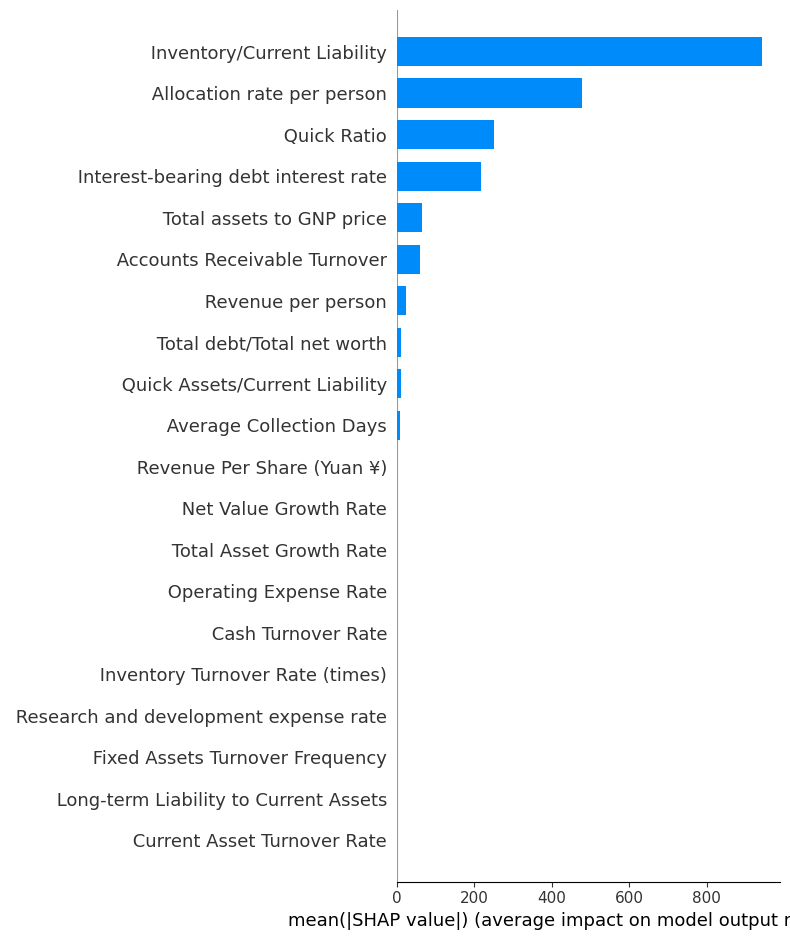

In [4]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


### Modelo de RandomForest

In [5]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.968841642228739
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5285
           1       0.51      0.12      0.20       171

    accuracy                           0.97      5456
   macro avg       0.74      0.56      0.59      5456
weighted avg       0.96      0.97      0.96      5456



### Modelo de SVM


In [6]:
svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7322214076246334
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      5285
           1       0.06      0.47      0.10       171

    accuracy                           0.73      5456
   macro avg       0.52      0.60      0.47      5456
weighted avg       0.95      0.73      0.82      5456



### Modelo de Regresion Lineal


In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


### Columnas que vamos a usar para el modelo

In [8]:
columns_model = [" Borrowing dependency",
 " Current Liability to Current Assets",                       
 " Net Value Per Share (C)",                                  
 " Non-industry income and expenditure/revenue",              
 " Net Value Growth Rate",                                    
 " Continuous interest rate (after tax)"]

### Modelo version final

In [9]:
X, y = df[columns_model], df["Bankrupt?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)



In [10]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.968108504398827
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5285
           1       0.47      0.15      0.23       171

    accuracy                           0.97      5456
   macro avg       0.72      0.57      0.61      5456
weighted avg       0.96      0.97      0.96      5456



### Saving the model

In [11]:
# Save the model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
# Load the model
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

